Purpose: to take a set of volumes aligned to the same volume (aka in the same coordinate space), pull out individual frames ~randomly. We then use a subset of identical frames to compare across volumes.

The data needs to be created ahead of time in FIJI using [FRC-QE plugin](https://www.biorxiv.org/content/10.1101/2020.09.10.291286v1) 

Open your volumes: in FIJI, make sure they are all in the same orientation. For this project, I'm assuming that you are most interested in coronal slices, so make sure your volumes are sliced coronally (e.g. for a sagittal volume, go to Tools > Stacks > Reslice and select Top and Rotate 90 degrees. This will place the volume in the orientation that matches Paxinos Watson). 

Run the analysis: Make sure you have the FRC-QE plugin installed. Go to Plugins > FRC-QE and select your xy and z options. I chose 256 xy and z=10 for this experiment. It should be the same across all volumes.

Save the results: When the FRC-QE score plot shows up, click List. Then make sure the listed results window is selected, and go to File > Save As and save with the {name of the brain}_FRC-QE.csv 

place all the results in the same folder and enter that folder location into "results_folder" below.

In [3]:
import os,csv,sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tifffile as tif

In [38]:
src = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/tiffs/"
brains = ["mouse_idisco_k302_to_PRA", "idisco_k320_to_PRA", "udisco_z268_to_PRA"]
# will want to do all of the below for each brain
results_folder = "/home/emilyjanedennis/Desktop/results_folder/"
refbrain = os.path.join(src,"PRA_10um.tif")

In [39]:
z,y,x = np.shape(refbrain)

In [60]:
slices = np.random.choice(z,100)

In [ ]:
for brainname in brains:
    brain = tif.imread(os.path.join(src,"{}.tif".format(brainname)))
    braindata = pd.read_csv(os.path.join(results_folder,'{}_FRC-QE.csv'.format(brainname)))
    braindata.insert(2,'brainname',brainname)
    if brainname == brains[0]:
        all_braindata = braindata
    else:
        all_braindata = pd.concat([all_braindata,braindata])
        

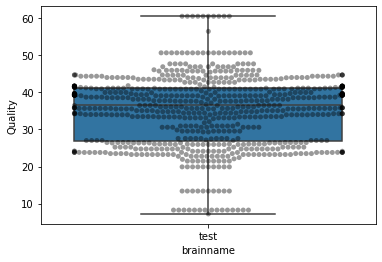

In [103]:
sns.boxplot(x="brainname",y="Quality",data=braindata)
sns.swarmplot(x="brainname",y="Quality",data=braindata,alpha=0.4, color="k")


In [83]:
braindata

,z_Position,Quality,brainname
0,0,8.2586,test
1,1,8.2586,test
2,2,8.2586,test
3,3,8.2586,test
4,4,8.2586,test
...,...,...,...
741,741,40.8683,test
742,742,40.8683,test
743,743,40.8683,test
744,744,40.8683,test


,z_Position,Quality
0,0,8.2586
1,1,8.2586
2,2,8.2586
3,3,8.2586
4,4,8.2586
...,...,...
741,741,40.8683
742,742,40.8683
743,743,40.8683
744,744,40.8683


AttributeError: 'int' object has no attribute 'lower'